In [1]:
import os
import sys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and prepare the data
data_path = "../data/yfinance_data/yfinance_data/AAPL_historical_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [3]:
# check for missing values
print(df.isnull().sum())
df.head()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
# from src.eda.explore import plot_correlation_matrix, plot_distribution
sys.path.append(os.path.abspath(os.path.join('../src')))
from src.outlier import *
print(sys.path)

ModuleNotFoundError: No module named 'src'

In [ ]:
for col in df:
    print(f"Outlier values of {col} : {list(z_score_outliers(col))} ")


columns = ["Open", "High", "Low", "Close"]

for col in columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


ModuleNotFoundError: No module named 'src'

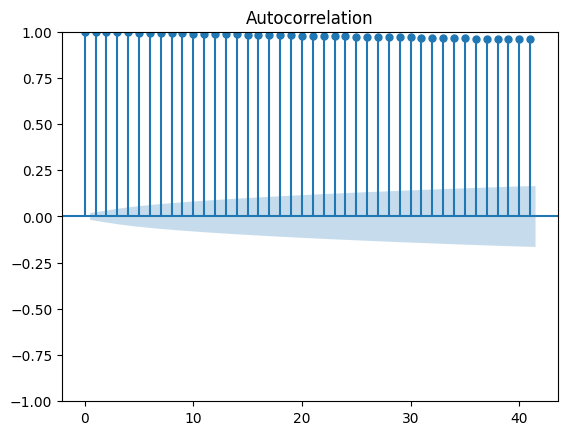

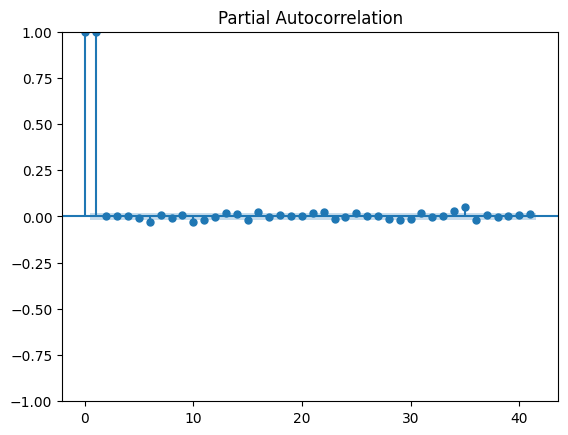

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df.Close)
plot_pacf(df.Close)
plt.show()

In [ ]:
# Apply TA-Lib technical indicators
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal

In [ ]:
# Cell 4: Use PyNance for financial metrics (example: daily returns)
# df['Daily_Return'] = stocks.returns(df['Close'])

In [ ]:
# Cell 5: Visualize the data and indicators
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.title('AAPL Close Price & 20-day SMA')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['RSI_14'], label='RSI (14)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI (14)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_Signal'], label='MACD Signal')
plt.title('AAPL MACD')
plt.legend()

plt.tight_layout()
plt.show()